In [1]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import datetime
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D as Line
from matplotlib.patheffects import Stroke
import matplotlib.ticker as mticker
import numpy as np
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform
import pandas as pd
import sb_tools
import cmocean



In [2]:
PF_transects = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/PolarFront/PolarFront_transects.xlsx')


In [3]:
# Define the two coordinate systems with different ellipses.
# ----
wgs84  = ccrs.PlateCarree(globe=ccrs.Globe(ellipse='WGS84'))

# Define the coordinate system of the data we have from Natural Earth and
# acquire the 1:10m physical coastline shapefile.
geodetic = ccrs.Geodetic(globe=ccrs.Globe(datum='WGS84'))
#dataset = cfeature.NaturalEarthFeature(category='physical',
#                                       name='coastline',
#

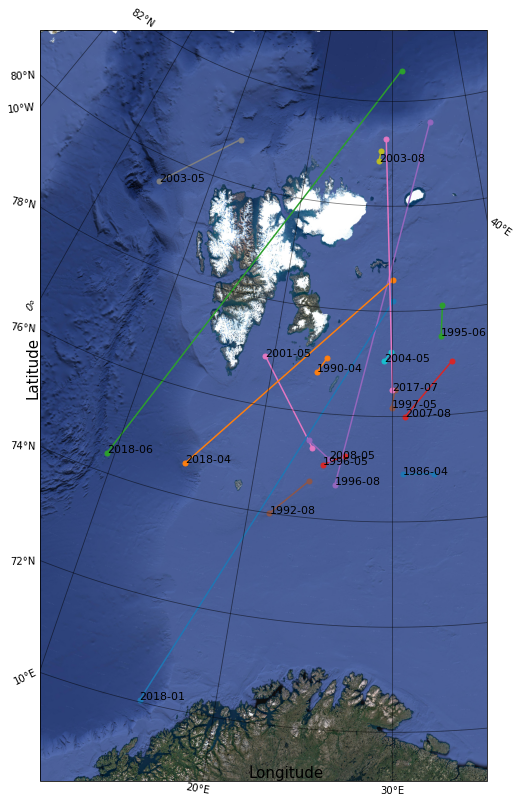

In [4]:
fig   = plt.figure(figsize=(8,14))
#ax    = plt.axes(projection = ccrs.PlateCarree())
proj = ccrs.Orthographic(central_longitude = 30, central_latitude = 75)
ax    = plt.axes(projection = proj)

# Set extent to Barents Sea
extent=[11, 35, 69, 83]
ax.set_extent(extent, crs = ccrs.PlateCarree())


# Add the Stamen aerial imagery at zoom level 7.
#tiler = Stamen('terrain-background')
tiler = GoogleTiles(style = 'satellite')
ax.add_image(tiler, 8)

gl = ax.gridlines(color='k', alpha=0.5, draw_labels = True)
gl.top_labels = False
gl.right_labels = False

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                    edgecolor='black',
                                    facecolor=cfeature.COLORS['land'])

# Add transects
for ind in range(0,len(PF_transects)-1):
    plt.plot([PF_transects['lon_start'][ind],PF_transects['lon_end'][ind]], 
             [PF_transects['lat_start'][ind],PF_transects['lat_end'][ind]], 
             '.-', label='Sampling Station', 
             markersize=10,transform=ccrs.PlateCarree())

    plt.text(PF_transects['lon_start'][ind], 
             PF_transects['lat_start'][ind], 
             datetime.datetime.strftime(PF_transects['when'][ind],'%Y-%m'), 
             fontsize=11,
             transform=ccrs.PlateCarree())

# Add axes labels
ax.text(0, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)
ax.text(0.55, 0, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)



fig.savefig('PF_transects.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')